<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 0.5px;">

In [6]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from math import pi

pause = True

In [7]:
#Define functions
###############################################
###############################################
def omega_1(g,l,k,m):
    return np.sqrt(g/l)

def omega_2(g,l,k,m):
    return np.sqrt((g/l) + (2*k/m))

def alpha_f(x1_0, x2_0, v1_0, v2_0):
    om1 = omega_1(g,l,k,m)
    result = 0.5*np.sqrt((x1_0 + x2_0)**2. + ((v1_0 + v2_0)/om1)**2.)
    return result

def beta_f(x1_0, x2_0, v1_0, v2_0):
    om2 = omega_2(g,l,k,m)
    result = 0.5*np.sqrt((x1_0 - x2_0)**2. + ((v1_0 - v2_0)/om2)**2.)
    return result

def phi1_f(x1_0, x2_0, v1_0, v2_0):
    om1 = omega_1(g,l,k,m)
    #result = arctan((-1/om)*(v1+v2)/(x1+x2))
    result = np.arctan2(-(v1_0+v2_0),om1*(x1_0+x2_0))
    return result

def phi2_f(x1_0, x2_0, v1_0, v2_0):
    om2 = omega_2(g,l,k,m)
    #result = arctan((-1/om)*(v1+v2)/(x1+x2))
    result = np.arctan2(-(v1_0-v2_0),om2*(x1_0-x2_0))
    return result

def B1_f(wd,g,l,k,m):
    om1 = omega_1(g,l,k,m)
    om2 = omega_2(g,l,k,m)
    result = (F0/m)*((k/m) + (g/l) - wd**2.)/((wd**2. - om1**2.)*(wd**2. - om2**2.))
    return result

def B2_f(wd,g,l,k,m):
    om1 = omega_1(g,l,k,m)
    om2 = omega_2(g,l,k,m)
    result = (F0/m)*(k/m)/((wd**2. - om1**2.)*(wd**2. - om2**2.))
    return result

def general_sol(t,g,l,k,m,x1_0,x2_0,v1_0,v2_0,wd):
    om1 = omega_1(g,l,k,m)
    om2 = omega_2(g,l,k,m)
    phi1 = phi1_f(x1_0, x2_0, v1_0, v2_0)
    phi2 = phi2_f(x1_0, x2_0, v1_0, v2_0)
    alpha = alpha_f(x1_0, x2_0, v1_0, v2_0)
    beta = beta_f(x1_0, x2_0, v1_0, v2_0)
    B1 = B1_f(wd,g,l,k,m)
    B2 = B2_f(wd,g,l,k,m)
    x1 = alpha*np.cos(om1*t + phi1) + beta*np.cos(om2*t + phi2) + B1*np.cos(wd*t)
    x2 = alpha*np.cos(om1*t + phi1) - beta*np.cos(om2*t + phi2) + B2*np.cos(wd*t)
    return x1, x2

def F_drive(t,wd):
    return F0*np.cos(wd*t)

In [8]:
def simData():
    global t0#, x1_nm1, x2_nm1, x1_nm2, x2_nm2, x1_gen, x2_gen

    t = np.linspace(0., 15., 1000)
    t_max = max(t)
    dt = t[1]-t[0]
    #t_max = 15.
    #dt = 0.01
    t0 = 0
    
    while t0 < t_max:
        if not pause:
            t0 = t0 + dt
        yield t0
    
def simPoints(simData):
    #t0, x1_nm1, x2_nm1, x1_nm2, x2_nm2, x1_gen, x2_gen = simData
    t0 = simData
    
    #plot1
    ############################# 
    line_1.set_data(t,general_sol(t,g,l,k,m,x1_0,x2_0,v1_0,v2_0,wd)[0])
    line_2.set_data(t,general_sol(t,g,l,k,m,x1_0,x2_0,v1_0,v2_0,wd)[1])
    vert_line_1.set_data([t0,t0],[-y_max_3,y_max_3])

    #plot2
    #############################    
    line_3.set_data(t,F_drive(t,wd))
    vert_line_2.set_data([t0,t0],[-y_max_3,y_max_3])
    
    #plot3
    #############################    
    line_4.set_data(general_sol(t0,g,l,k,m,x1_0,x2_0,v1_0,v2_0,wd)[0] - 1.25, 0.)
    line_5.set_data(general_sol(t0,g,l,k,m,x1_0,x2_0,v1_0,v2_0,wd)[1] + 1.25, 0.)
    
    #plot4
    #############################    
    #line_6.set_data(F_drive(t0,wd) - 1.25, 0.)
    line_6.set_data([-1.25, -1.25 + F_drive(t0,wd)], [0., 0.])
    
    #plot5
    #############################    
    line_7.set_data(wd_range,B1_f(wd_range,g,l,k,m))
    line_8.set_data(wd_range,B2_f(wd_range,g,l,k,m))
    vert_line_3.set_data([wd,wd],[-y_max_3,y_max_3])
    
    
    return line_1, line_2, vert_line_1, line_3, vert_line_2, line_4, line_5, line_6, line_7, line_8, vert_line_3

<IPython.core.display.Javascript object>


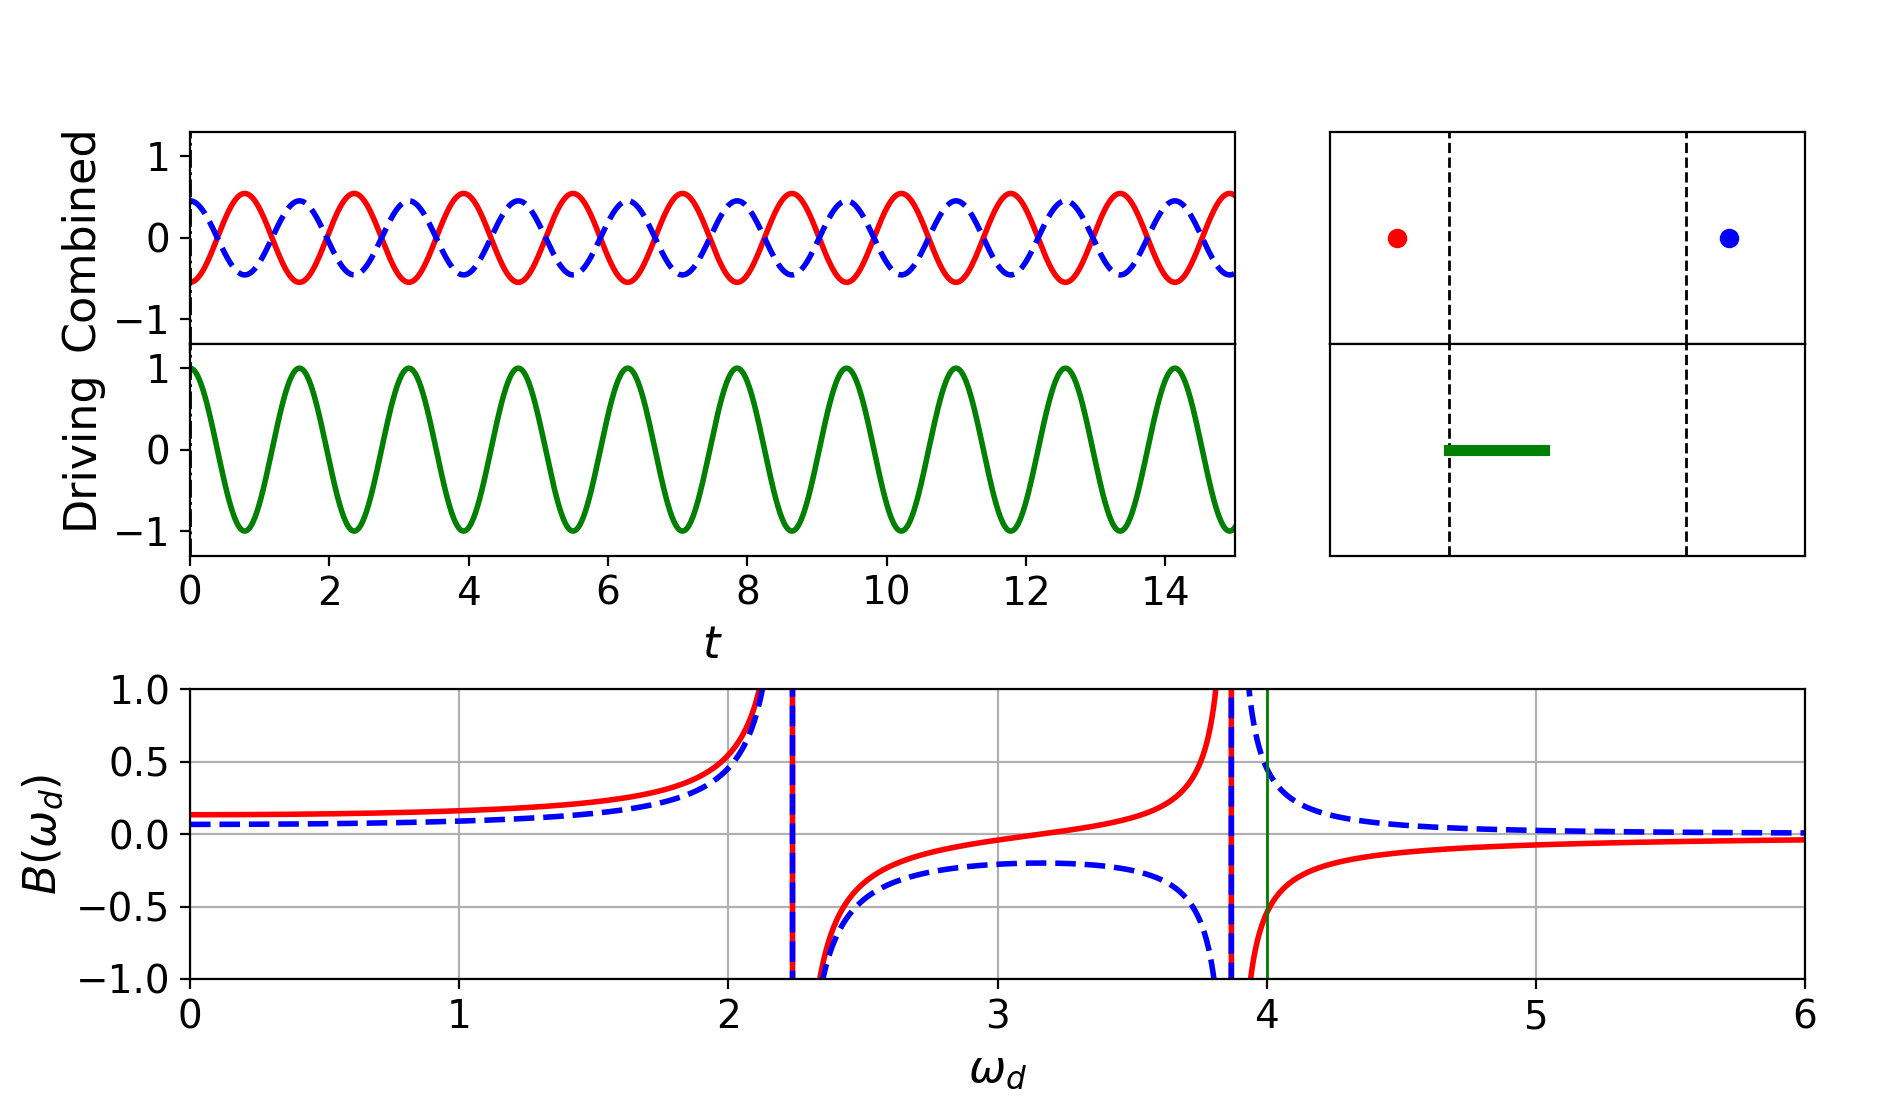

Button(description='Run/Stop', style=ButtonStyle(), tooltip='Description')

Button(description='Reset', style=ButtonStyle(), tooltip='Description')

In [9]:
#Define plot
###############################################
###############################################
fig = plt.figure(figsize=(9.5, 5.5))
plt.subplots_adjust(left=0.1, bottom=None, right=0.95, top=None, wspace=0.2, hspace=1.)

t = np.linspace(0., 15., 1000)
wd_range = np.linspace(0.,6.,1000)

F0 = 1.
wd = 4.
g = 2.5
l = 0.5
k = 5.
m = 1.

t0 = 0.
x1_0 = 0.
x2_0 = 0.
v1_0 = 0.
v2_0 = 0.


#Set GridSpec
#############################
gs_top = plt.GridSpec(4, 3, hspace = 0.)
gs_bottom = plt.GridSpec(4, 3, hspace = 1.5, top = 0.75)


#plot1
#############################
#ax1 = plt.subplot2grid((3, 3), (0, 0), colspan = 2)
ax1 = fig.add_subplot(gs_top[0,:2])
y_max_1 = 1.3

line_1, = ax1.plot([], [],
        'r-', lw=2)

line_2, = ax1.plot([], [],
        'b--', lw=2)

vert_line_1, = ax1.plot([], [], 'k-.', lw=1)


#plot params
ax1.set_ylabel('Combined', fontsize=16)
#ax1.set_xlabel('$t$', fontsize=16)
ax1.set_xlim(min(t),max(t))
ax1.set_ylim(-y_max_1,y_max_1)
ax1.grid(False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=14)

#plot2
#############################
#ax2 = plt.subplot2grid((3, 3), (1, 0), colspan = 2, sharex = ax1)
ax2 = fig.add_subplot(gs_top[1,:2], sharex = ax1)

y_max_2 = 1.3

line_3, = ax2.plot([], [],
        'g-', lw=2)

vert_line_2, = ax2.plot([], [], 'k-.', lw=1)

#plot params
ax2.set_ylabel('Driving', fontsize=16)
ax2.set_xlabel('$t$', fontsize=16)
ax2.set_xlim(min(t),max(t))
ax2.set_ylim(-y_max_2,y_max_2)
ax2.grid(False)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)


#plot3
#############################
#ax3 = plt.subplot2grid((3, 3), (0, 2))
ax3 = fig.add_subplot(gs_top[0,2:])
y_max_3 = 1.3

ax3.plot([-1.25,-1.25],[-y_max_3,y_max_3],'k--',lw=1)
ax3.plot([1.25,1.25],[-y_max_3,y_max_3],'k--',lw=1)

line_4, = ax3.plot([], [], 'ro', lw=2)
line_5, = ax3.plot([], [], 'bo', lw=2)

#plot params
ax3.set_xlim(-2.5,2.5)
ax3.set_ylim(-y_max_3,y_max_3)
ax3.grid(False)
ax3.set_yticklabels([])
ax3.set_xticklabels([])
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)


#plot4
#############################
#ax4 = plt.subplot2grid((3, 3), (1, 2))
ax4 = fig.add_subplot(gs_top[1,2:])
y_max_3 = 1.3

ax4.plot([-1.25,-1.25],[-y_max_3,y_max_3],'k--',lw=1)
ax4.plot([1.25,1.25],[-y_max_3,y_max_3],'k--',lw=1)

line_6, = ax4.plot([], [], 'g-', lw=4)

#plot params
ax4.set_xlim(-2.5,2.5)
ax4.set_ylim(-y_max_3,y_max_3)
ax4.grid(False)
ax4.set_yticklabels([])
ax4.set_xticklabels([])
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)


#plot5
#############################
#ax5 = plt.subplot2grid((3, 3), (2, 0), colspan = 3)
ax5 = fig.add_subplot(gs_bottom[2:,:])
y_max_3 = 1.3

line_7, = ax5.plot([], [],
        'r-', lw=2)

line_8, = ax5.plot([], [],
        'b--', lw=2)

vert_line_3, = ax5.plot([], [], 'g-', lw=1)

#plot params
ax5.set_ylabel('$B(\omega_{d}$)', fontsize=16)
ax5.set_xlabel('$\omega_{d}$', fontsize=16)
ax5.set_xlim(min(wd_range),max(wd_range))
ax5.set_ylim(-1,1)
ax5.grid(True)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)


#Animate
###############################################
###############################################
ani = animation.FuncAnimation(fig, simPoints, simData, blit=False, interval=5,
    repeat=True)


#Define buttons
###############################################
###############################################
def onClick_1(event):
    global pause
    pause ^= True

        
b1 = widgets.Button(
    value=True,
    description='Run/Stop',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description'
)

b1.on_click(onClick_1)
display(b1)


def onClick_2(event):
    global t0
    t0 = 0

b2 = widgets.Button(
    value=True,
    description='Reset',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description'
)

b2.on_click(onClick_2)
display(b2)


#Define parameter updater
###############################################
###############################################
def update_1(V):
    global x1_0
    x1_0 = V['new']
    return

def update_2(V):
    global x2_0
    x2_0 = V['new']
    return

def update_3(V):
    global g
    g = V['new']
    return

def update_4(V):
    global l
    l = V['new']
    return

def update_5(V):
    global k
    k = V['new']
    return

def update_6(V):
    global wd
    wd = V['new']
    return


#Define control elements
###############################################
###############################################
# s0=widgets.FloatSlider(
#     min=0.,
#     max=15.,
#     step=0.01,
#     value=0.,
#     layout=Layout(width='500px'),
#     description='$t$',
#     style = {'description_width': 'initial'})


# s1=widgets.FloatSlider(
#     min=-1.,
#     max=1.,
#     step=0.01,
#     value=0.,
#     layout=Layout(width='500px'),
#     description='$x_{1}(0)$',
#     style = {'description_width': 'initial'})


# s2=widgets.FloatSlider(
#     min=-1.,
#     max=1.,
#     step=0.01,
#     value=0.,
#     layout=Layout(width='500px'),
#     description='$x_{2}(0)$',
#     style = {'description_width': 'initial'})


# s3=widgets.FloatSlider(
#     min=-1.,
#     max=1.,
#     step=0.01,
#     value=0.,
#     layout=Layout(width='500px'),
#     description='$v_{1}(0)$',
#     style = {'description_width': 'initial'})


# s4=widgets.FloatSlider(
#     min=-1.,
#     max=1.,
#     step=0.01,
#     value=0.,
#     layout=Layout(width='500px'),
#     description='$v_{2}(0)$',
#     style = {'description_width': 'initial'})


s5=widgets.FloatSlider(
    min=0.,
    max=50.,
    step=0.01,
    value=2.5,
    layout=Layout(width='500px'),
    description='$g$',
    style = {'description_width': 'initial'})

s6=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=0.5,
    layout=Layout(width='500px'),
    description='$l$',
    style = {'description_width': 'initial'})

s7=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.01,
    value=5.,
    layout=Layout(width='500px'),
    description='$k$',
    style = {'description_width': 'initial'})


s8=widgets.FloatSlider(
    min=0.,
    max=6.,
    step=0.01,
    value=4.,
    layout=Layout(width='500px'),
    description='$\omega_{d}$',
    style = {'description_width': 'initial'})


s5.value = g
s5.observe(update_3, names='value')

s6.value = l
s6.observe(update_4, names='value')

s7.value = k
s7.observe(update_5, names='value')

s8.value = wd
s8.observe(update_6, names='value')


#Connect controls to plot
###############################################
###############################################
#out = interactive_output(update, {'t0': s0, 'x1_0': s1,'x2_0': s2, 'g': s5, 'l': s6, 'k': s7})
#out_1 = interactive_output(update_1, {'x1_0': s1})
#out_2 = interactive_output(update_2, {'x2_0': s2})
out_3 = interactive_output(update_3, {'g': s5})
out_4 = interactive_output(update_4, {'l': s6})
out_5 = interactive_output(update_5, {'k': s7})
out_6 = interactive_output(update_6, {'wd': s8})

#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s8, s5, s6, s7], layout=box_layout))

<hr style="height: 0.5px;">

<h2>About the Visualization</h2>

<font size="3">These plots show the amplitude of two coupled, DRIVEN pendula, connected by a spring. One can vary the driving frequency, which is also displayed. The amplitude of each oscillator is shown in the lower plot, and the motions of the oscillators and the driving force are shown in the righthand plot.
</font>


<br/>
<font size="3">
<b>Plot 1 (left):</b>
<ul>
    <li>(upper) amplitude of both oscillators in linear combination of normal mode 1 and 2, as function of time</li>
    <li>(lower-green) amplitude of the driving force, as function of time</li>
    <li>red solid line shows the amplitude of the left oscillator</li>
    <li>blue dashed line shows the amplitude of the right oscillator</li>
</ul>
    
<br/>
<b>Plot 2 (right):</b>
<ul>
    <li>(upper) motion of both oscillators in linear combination of normal mode 1 and 2</li>
    <li>(lower-green) magnitude and direction of driving force</li>
    <li>red and blue colors represent oscillator 1 (left) and oscillator 2 (right), respectively.</li>
</ul>
  
<br/>
<b>Plot 3 (lower):</b>
<ul>
    <li>amplitde of both oscillators as a function of driving frequency</li>
    <li>red solid line shows the amplitude of the left oscillator</li>
    <li>blue dashed line shows the amplitude of the right oscillator</li>
</ul>

<br/>
<b>Sliders:</b>
<ul>
    <li>$\omega_{d}$: vary the driving frequency within the range $[0.0,6.0]\,\mathrm{Hz}$ </li>
    <li>$g$: vary the gravitational constant within the range $[0.0,50.0]\,\mathrm{ms^{-2}}$</li>
    <li>$l$: vary the length of both pendula within the range $[0.0,10.0]\,\mathrm{m}$</li>
    <li>$k$: vary the spring constant within the range $[0.0,10.0]\,\mathrm{Nm^{-1}}$</li>
</ul>


<br/>
<b>Buttons:</b> press "Run/Stop" to view the motion of the system as a function of time. Press "Reset" to start time at $t=0\,\mathrm{s}$.

</font>

<br/>
<br/>

<hr style="height: 0.5px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>What driving frequency will make the coupled pendula oscillate in one of the normal modes of the system?</li>
    <li>What driving frequency will make only ONE pendulum oscillate?</li>
    <li>How do the parameters of the system affect the frequency of the normal modes?</li>
</ul>      
</font>

<br/>

<hr style="height: 0.5px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [10]:
#Enable hidden code
###############################################
###############################################
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
